Upload an image:


Saving download (1).jpg to download (1).jpg


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(



**Generated Caption:** a small lizard sitting on a pink flower


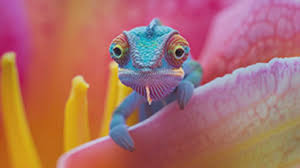

In [ ]:
# Install necessary libraries
!pip install transformers Pillow -q

# Import required libraries
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import IPython.display as display
import os

# Load the BLIP model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate captions
def generate_caption(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(image, return_tensors="pt")
    output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)
    return caption

# Upload an image
from google.colab import files

print("Upload an image:")
uploaded = files.upload()

# Process the uploaded image
image_path = next(iter(uploaded))  # Get the uploaded file name
caption = generate_caption(image_path)

# Display the image and its caption
print("\n**Generated Caption:**", caption)
display.display(Image.open(image_path))
